In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['Y'] = iris.target

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Descriptions:

Ce dataset décrit differents types d'Iris(Iris setosa, Iris virginica, Iris versicolor) selon plusieurs paramètres tels que la longueur et la largeur des pétales et des sépales.

**Origine:** Le dataset Iris connus aussi sous le nom de **Iris Fisher** présenté en **1936** par Ronal Fisher dans son papier "The use of multiple measusurements in taxonomic problems"

**Variables:**

- *sepal length:* correspond à la longueur du sépale
- *sepal width:* correspond à la largeur du sépale
- *petal length:* correspond à la longueur du pétale
- *petal width:* correspond à la largeur du pétale
- *Y*: correspond au type d'Iris(avec 0:setosa, 1:versicolor, 2:virginica)

**Objectif:** L'objectif de cette étude et connaître le type (Y) d'iris selon ces parametres(sepal length, ...)


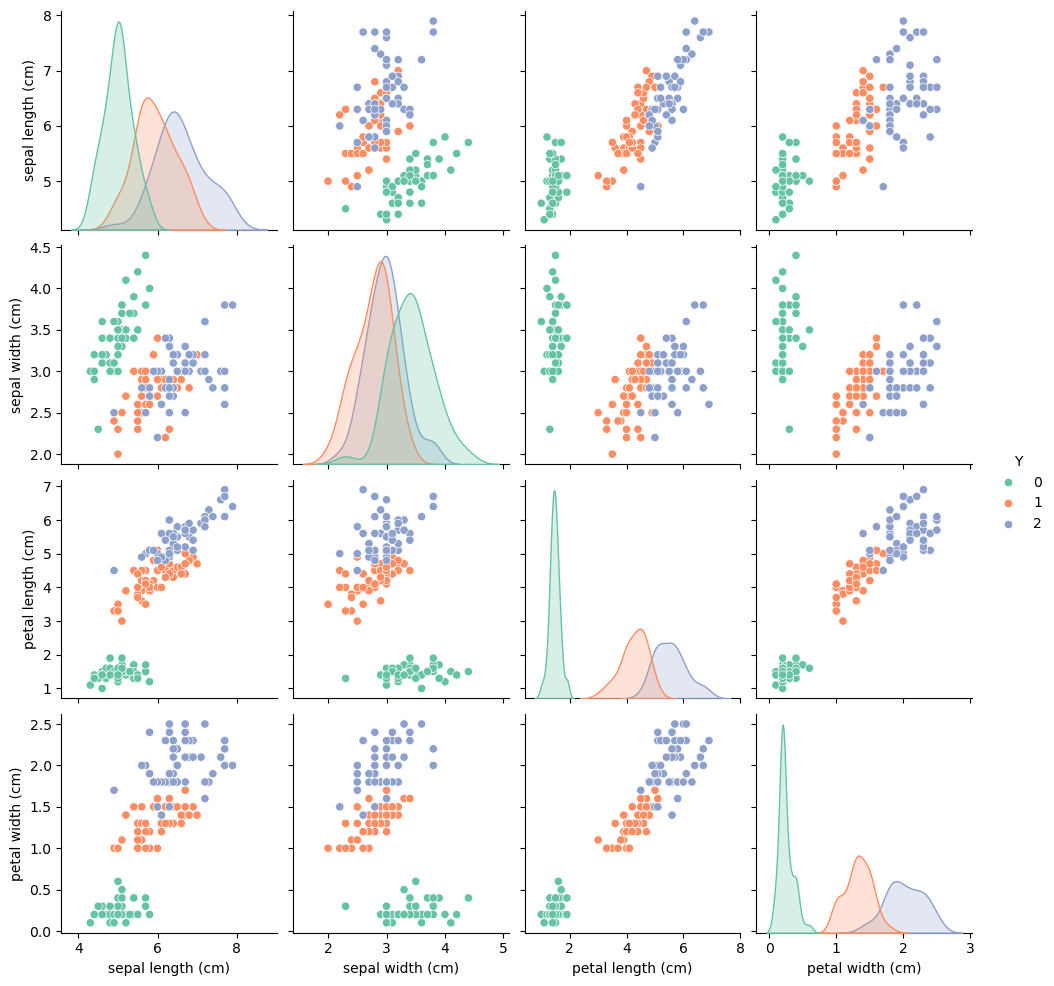

In [2]:
import seaborn as sbn

sbn.pairplot(df_iris, hue="Y", palette="Set2", )

# Discussions

en un coup d'oeil,

On peut distinguer que setosa(0) contrairement aux deux autres possède des petits pétales avec un longueur <= 2cm et une largeur < 1.0cm.

On peut aussi voir que la largeur des petales peut déjà plus ou moin bien décrire le type de d'Iris car:

- largeur < 1  : setosa(0)

- largeur >= 1 and largeur < 1.5 : versicolor(1) (majorité)

- largeur >= 1.5 : virginica(2) (majorité)


# Préparation des données

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_iris.drop(columns=["Y"])
y = df_iris["Y"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=47)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Regression logistique

In [55]:
import time

model = LogisticRegression()

start_time_log = time.time()
model.fit(X_train, y_train)
training_time_log = time.time() - start_time_log

y_pred = model.predict(X_test)

log_accuracy = accuracy_score(y_test, y_pred)
log_conf_matrix = confusion_matrix(y_test, y_pred)

print("train data number: ", len(X_train))
print("training time (secondes): ", training_time_log)
print("Logistique regression accuracy:", log_accuracy)

train data number:  105
training time (secondes):  0.011277914047241211
Logistique regression accuracy: 0.9777777777777777


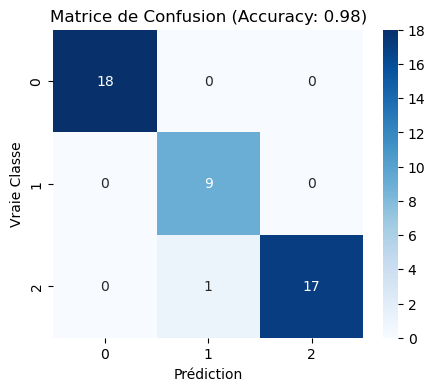

In [56]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 4))
sbn.heatmap(log_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Prédiction")
plt.ylabel("Vraie Classe")
plt.title(f"Matrice de Confusion (Accuracy: {log_accuracy:.2f})")
plt.show()

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

k = 3

model_knn = KNeighborsClassifier(n_neighbors=k)

start_time_knn = time.time()
model_knn.fit(X_train, y_train)
training_time_knn = time.time() - start_time_knn

y_pred_knn = model_knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)

print("train data number: ", len(X_train))
print("training time(secondes): ", training_time_knn)
print("KNN accuracy:", knn_accuracy)

train data number:  105
training time(secondes):  0.0010945796966552734
KNN accuracy: 0.9777777777777777


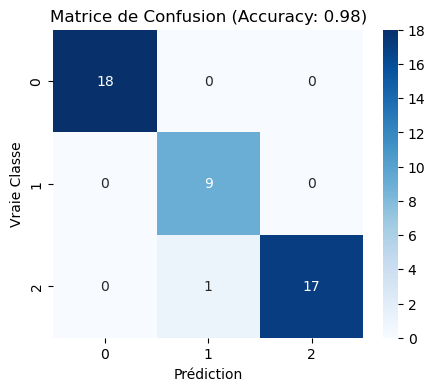

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 4))
sbn.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Prédiction")
plt.ylabel("Vraie Classe")
plt.title(f"Matrice de Confusion (Accuracy: {knn_accuracy:.2f})")
plt.show()

# Comparaison

## Pour un nombre de donnée de 105 d'Iris dataset

Regression logistique **VS** KNN avec k=3

Durée d'entrainement: 0.011277914047241211 **VS** 0.0010945796966552734 (WINNER ```KNN```)

Performance: 0.9777777777777777 **VS** 0.9777777777777777 (WINNER ```Regression logistique AND KNN```)

## Conclusion

Il est plus interessant d'utiliser KNN car en plus d'etre plus rapide à l'apprentissage, il est paramétrique(k) contrairement à la regression logistique.
Mais KNN ou regression logistique sont aussi performant l'une de l'autre en faisant tout les deux une erreur sur viginica(2) (pour versicolor(1) prédit).

## Remarque sur KNN
Pour k=5 KNN est plus lent et moin performant